In [11]:
import jyrobot
import math

In [12]:
world = jyrobot.load("two-scribblers")

In [13]:
world.config["filename"]

'/home/dblank/jyrobot/jyrobot/worlds/two-scribblers.json'

In [15]:
world.save()

Exception: unable to save world config file

In [5]:
world.watch("right")

In [4]:
world.reset()
world.robots[0].va = 0
world.robots[0].vx = 2
world.robots[0].x = 450
world.robots[1].va = math.pi/10
world.draw()

In [5]:
def control(world):
    #pic = world.robots[0].cameras[0].takePicture()
    #clear_output(wait=True)
    #display(pic)
    #print(world.stop)
    if world.robots[0].stalled:
        world.robots[0].vx = -world.robots[0].vx
        #return True

In [6]:
%%time
world.run(control, show=True)

CPU times: user 1.21 s, sys: 24.1 ms, total: 1.23 s
Wall time: 11.2 s


In [ ]:
world.time

In [ ]:
world.reset()
world.robots[0].va = 0
world.robots[0].vx = 2
world.robots[0].x = 450
world.robots[1].va = math.pi/10
world.draw()

In [ ]:
%%time
world.seconds(10, control, show=True)

In [22]:
world.step()
world.step()
world.step()
world.step()
world.step()
world.step()
world.step()

In [8]:
from jyrobot.utils import throttle 
import time

In [15]:
env = {"count": 0}

@throttle(0.5)
def doit():
    env["count"] += 1

In [36]:
while True:
    doit()

KeyboardInterrupt: 

In [18]:
doit()
doit()

In [17]:
env

{'count': 0}

In [19]:
import asyncio

class Timer:
    def __init__(self, timeout, callback):
        self._timeout = timeout
        self._callback = callback
        self._task = asyncio.ensure_future(self._job())

    async def _job(self):
        await asyncio.sleep(self._timeout)
        self._callback()

    def cancel(self):
        self._task.cancel()

In [20]:
import asyncio
from time import time

def throttle(wait):
    """ Decorator that prevents a function from being called
        more than once every wait period. """
    def decorator(fn):
        time_of_last_call = 0
        scheduled = False
        new_args, new_kwargs = None, None
        def throttled(*args, **kwargs):
            nonlocal new_args, new_kwargs, time_of_last_call, scheduled
            def call_it():
                nonlocal new_args, new_kwargs, time_of_last_call, scheduled
                time_of_last_call = time()
                fn(*new_args, **new_kwargs)
                scheduled = False
            time_since_last_call = time() - time_of_last_call
            new_args = args
            new_kwargs = kwargs
            if not scheduled:
                new_wait = max(0, wait - time_since_last_call)
                Timer(new_wait, call_it)
                scheduled = True
        return throttled
    return decorator

In [23]:
from ipywidgets import widgets

slider = widgets.IntSlider()
text = widgets.IntText()

count = 0

@throttle(1.0)
def value_changed(change):
    global count
    count += 1
    text.value = change.new
slider.observe(value_changed, 'value')

widgets.VBox([slider, text])

In [26]:
count

8

In [23]:
from datetime import datetime, timedelta
from functools import wraps

In [24]:
class throttle(object):
    """
    Decorator that prevents a function from being called more than once every
    time period.
    To create a function that cannot be called more than once a minute:
        @throttle(minutes=1)
        def my_fun():
            pass
    """
    def __init__(self, seconds=0, minutes=0, hours=0):
        self.throttle_period = timedelta(
            seconds=seconds, minutes=minutes, hours=hours
        )
        self.time_of_last_call = datetime.min

    def __call__(self, fn):
        @wraps(fn)
        def wrapper(*args, **kwargs):
            now = datetime.now()
            time_since_last_call = now - self.time_of_last_call

            if time_since_last_call > self.throttle_period:
                self.time_of_last_call = now
                return fn(*args, **kwargs)

        return wrapper

In [25]:
@throttle(0.5)
def doit():
    print("ok")

In [28]:
while True:
    doit()


ok
ok
ok
ok
ok
ok
ok
ok


KeyboardInterrupt: 

In [7]:
!pip list | grep ipylab

ipylab              0.3.0               /home/dblank/ipylab


In [8]:
from ipylab import JupyterFrontEnd

In [9]:
app = JupyterFrontEnd()

In [11]:
app.shell.widgets.keys()

dict_keys(['94281d639969423e90b73778549f9f9f', '273b7440c35a45d9bf76cf577e92f864', '92dbce27f566408b968abfbb0b02656f', 'ab537f76e19c45c28c3952e216c16b30', '2404004c41b446b69a663d38bb97f498', 'ffb91a4730454ffa9e292933344ca29e', '6591835132b94c59918f435fbb95ad24', 'bd3abdaced2740cf95be48aa3a186c25', '8f1c7a036adc4f44aa8ddc54882ca2f6', '1c8a9c10678a437fba1433b1cf411d0b', '71f117b3e8284c51a3f15bdcdd6698c9', 'c3079e70b0bc45bb8db5727a1cd9a034', '912cded7a218495aa66fd1cca78c0ad0'])

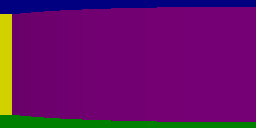

In [12]:
world.robots[0].cameras[0].takePicture()